In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import os
import time
from matplotlib import rcParams
import matplotlib.pyplot as plt
from __future__ import print_function, division
from six import iteritems
%matplotlib inline
rcParams['figure.figsize'] = (13, 6)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the Climate Historical NormalsDataset

While the dataset has great statistics, organizing the data to match the granularity on the Electricity, Water, and Gas datasets won't be possible for now.

In [ ]:
file_path = "/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Climate_HistoricalNormals.csv"
df = pd.read_csv(file_path)
df.head()

,Item,Item Detail,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Precipitation,Rainfall (mm),242.3,174.2,168.3,144.4,111.7,97.3,62.4,64.8,81.2,202.1,304,230.9,1883.6
1,Precipitation,Snowfall (cm),18.8,15.1,3.8,1.3,0,0,0,0,0,0.2,4.1,19.3,62.6
2,Precipitation,Precipitation (mm),261.1,189.3,172,145.7,111.7,97.3,62.4,64.8,81.2,202.3,308.1,250.2,1946.2
3,Precipitation,Average Snow Depth (cm),2,2,0,0,0,0,0,0,0,0,0,1,0.0
4,Precipitation,Median Snow Depth (cm),1,0,0,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
df.head()

,Item,Item Detail,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Precipitation,Rainfall (mm),242.3,174.2,168.3,144.4,111.7,97.3,62.4,64.8,81.2,202.1,304,230.9,1883.6
1,Precipitation,Snowfall (cm),18.8,15.1,3.8,1.3,0,0,0,0,0,0.2,4.1,19.3,62.6
2,Precipitation,Precipitation (mm),261.1,189.3,172,145.7,111.7,97.3,62.4,64.8,81.2,202.3,308.1,250.2,1946.2
3,Precipitation,Average Snow Depth (cm),2,2,0,0,0,0,0,0,0,0,0,1,0.0
4,Precipitation,Median Snow Depth (cm),1,0,0,0,0,0,0,0,0,0,0,0,0.0


# Load the Climate Hourly Dataset



In [ ]:
file_path = "/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Climate_HourlyWeather.csv"
df = pd.read_csv(file_path)
df.set_index('Date/Time', inplace=True)
df.drop(['Year','Month','Day','Time'], axis=1, inplace=True)
df.head()

,Data Quality,Temp (C),Temp Flag,Dew Point Temp (C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,
2012-04-01 00:00,NaN,4.3,NaN,2.3,NaN,87.0,NaN,30.0,NaN,28.0,NaN,12.9,NaN,99.88,NaN,NaN,NaN,NaN,NaN,Rain
2012-04-01 01:00,NaN,4.4,NaN,2.2,NaN,86.0,NaN,30.0,NaN,17.0,NaN,8.0,NaN,99.94,NaN,NaN,NaN,NaN,NaN,Rain - Fog
2012-04-01 02:00,NaN,3.8,NaN,1.6,NaN,86.0,NaN,30.0,NaN,26.0,NaN,6.4,NaN,100.00,NaN,NaN,NaN,NaN,NaN,Rain - Fog
2012-04-01 03:00,NaN,2.8,NaN,0.7,NaN,86.0,NaN,29.0,NaN,39.0,NaN,8.0,NaN,100.10,NaN,NaN,NaN,NaN,NaN,Rain - Fog
2012-04-01 04:00,NaN,2.4,NaN,0.4,NaN,87.0,NaN,29.0,NaN,30.0,NaN,9.7,NaN,100.23,NaN,NaN,NaN,NaN,NaN,Moderate Rain


## Data Exploration

In [ ]:
df.columns

Index(['Data Quality', 'Temp (C)', 'Temp Flag', 'Dew Point Temp (C)',
       'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag',
       'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)',
       'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag',
       'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill',
       'Wind Chill Flag', 'Weather'],
      dtype='object')

In [ ]:
df.shape

(17520, 20)

#### Check Null Values

In [ ]:
# Find Nulls in dataset
# Count the number of missing values in each column
missing_values_count = df.isna().sum()

# Print the count of missing values
missing_values_count.sort_values(ascending=False)


Visibility Flag        17520
Wind Chill Flag        17520
Hmdx Flag              17520
Temp Flag              17513
Wind Dir Flag          17505
Wind Spd Flag          17503
Stn Press Flag         17500
Dew Point Temp Flag    17499
Rel Hum Flag           17497
Wind Chill             16972
Hmdx                   16857
Data Quality           10535
Weather                 3667
Wind Dir (10s deg)       857
Rel Hum (%)               38
Dew Point Temp (C)        36
Stn Press (kPa)           35
Wind Spd (km/h)           31
Temp (C)                  22
Visibility (km)           15
dtype: int64

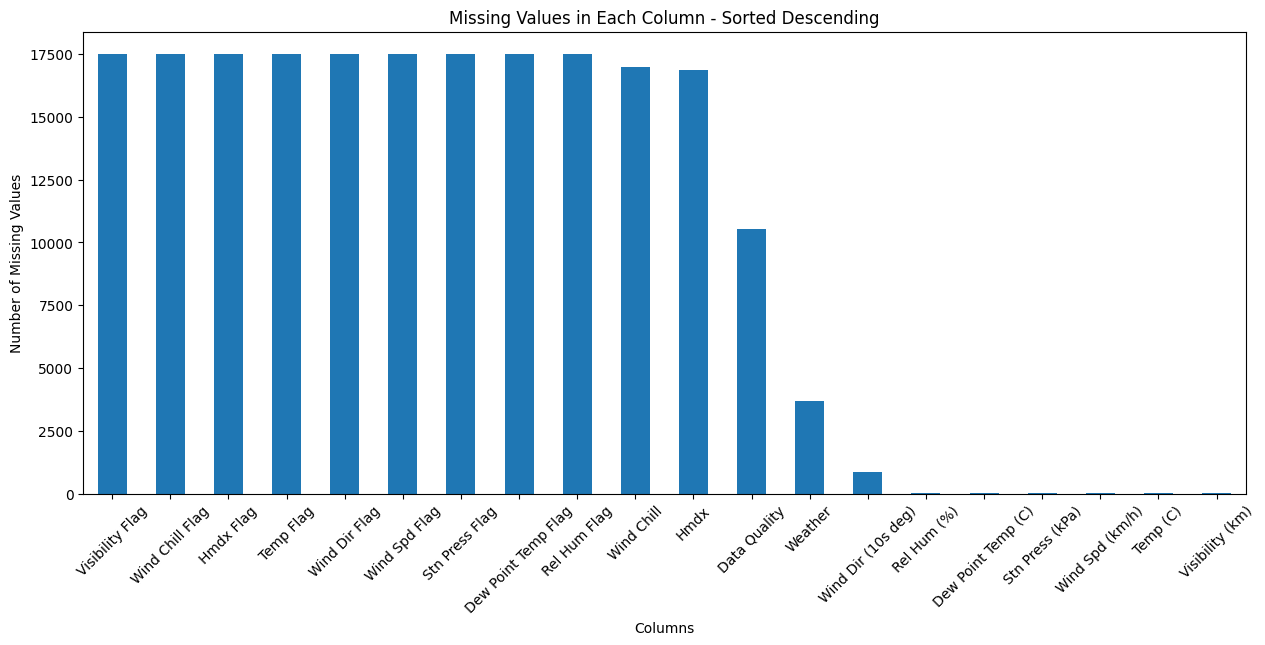

In [ ]:
# Find the number of missing values in each column
missing_values_count = df.isna().sum()

# Sort the missing values in descending order
missing_values_sorted = missing_values_count.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 6))  # Adjust the figure size as necessary
missing_values_sorted.plot(kind='bar')  # Create a bar chart with sorted values
plt.title('Missing Values in Each Column - Sorted Descending')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

## Check Columns by Month

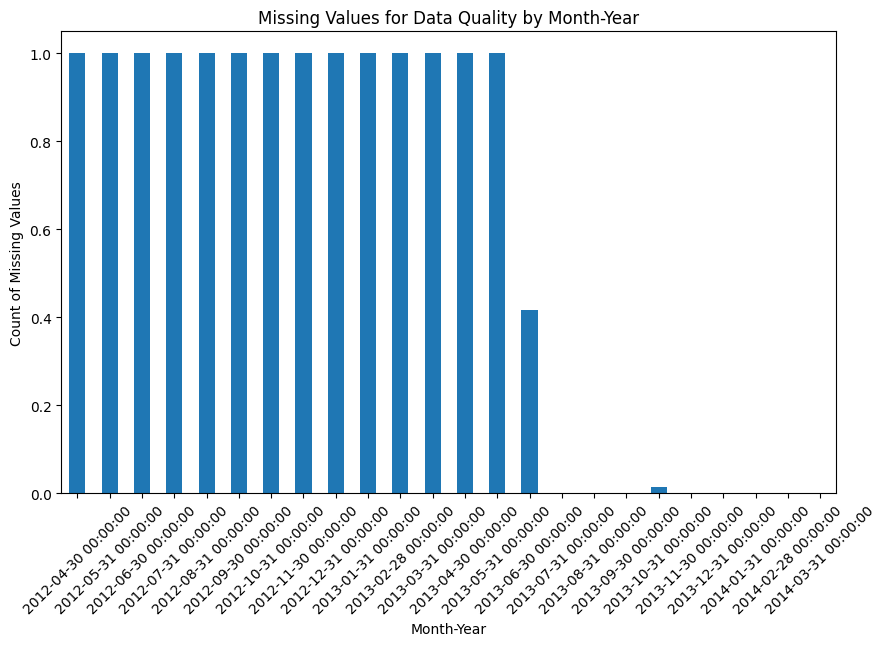

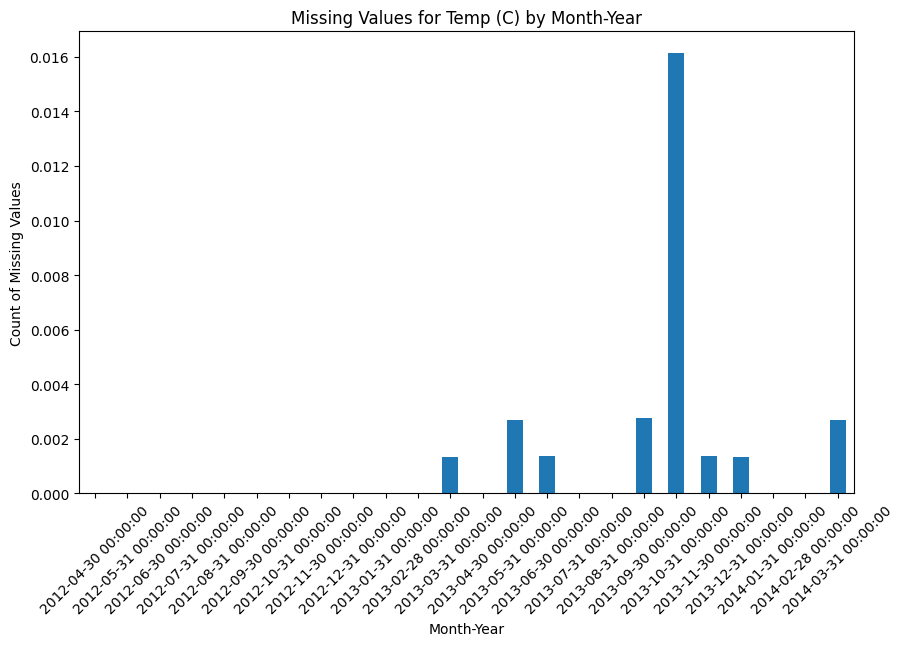

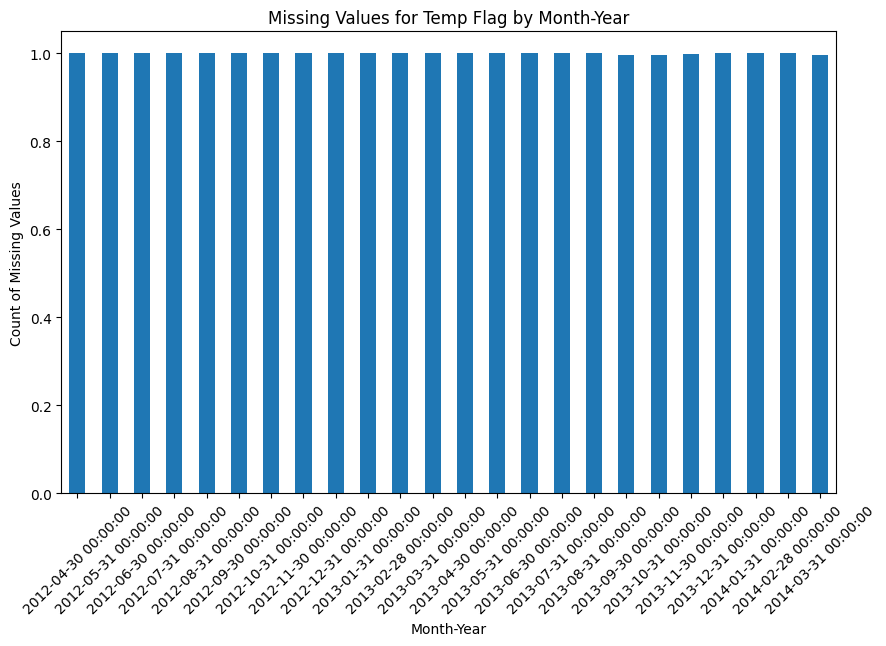

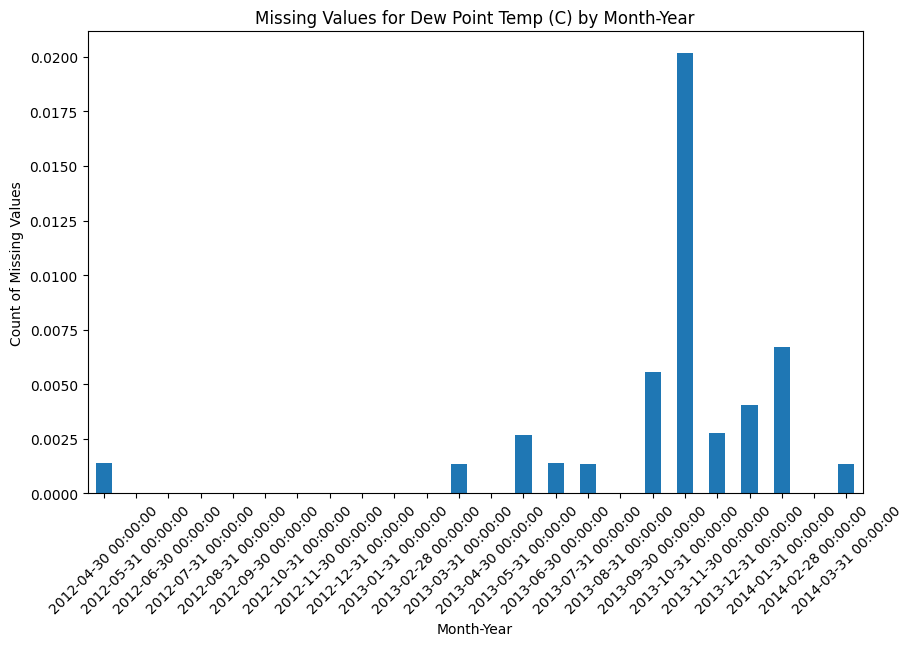

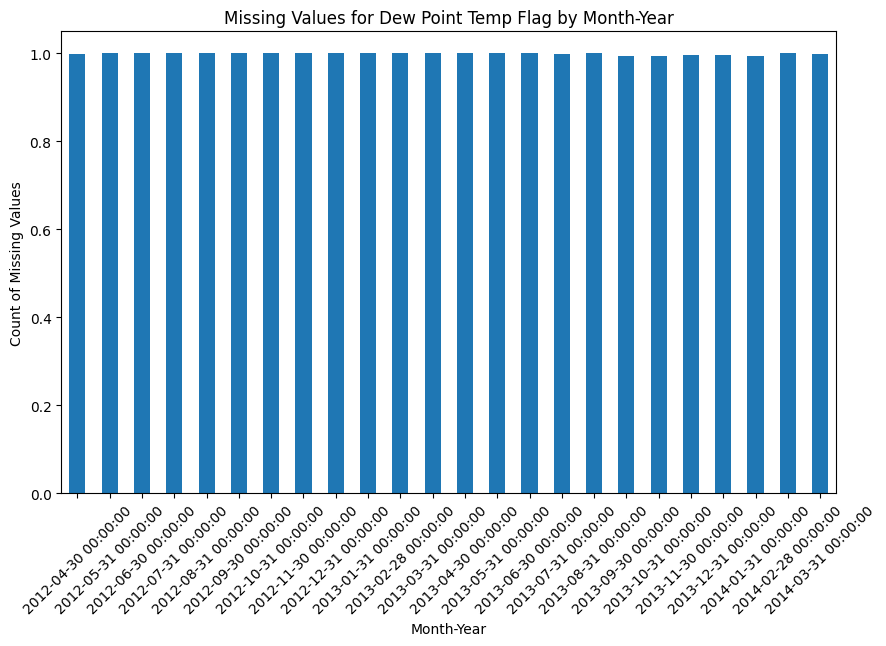

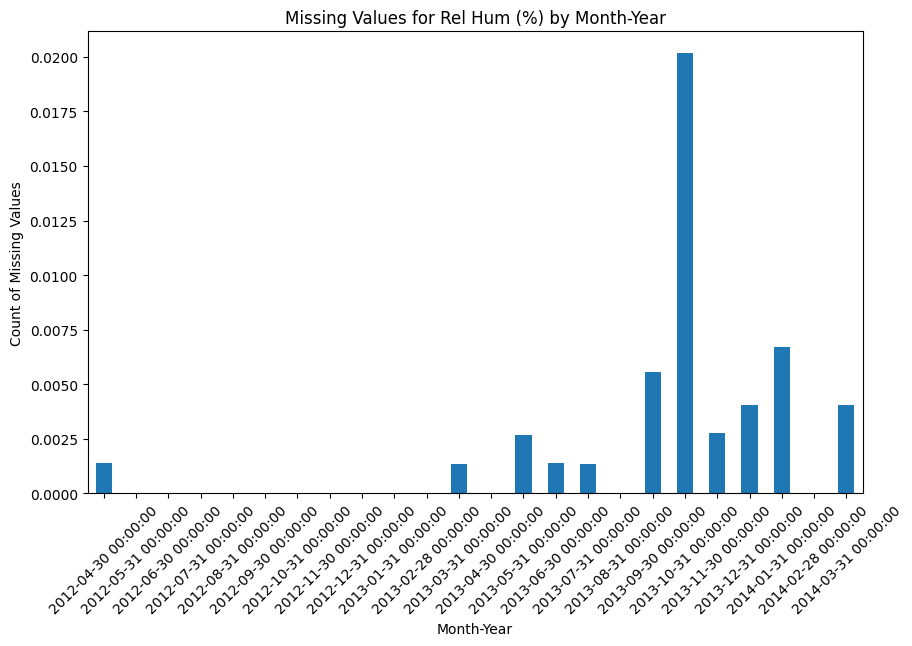

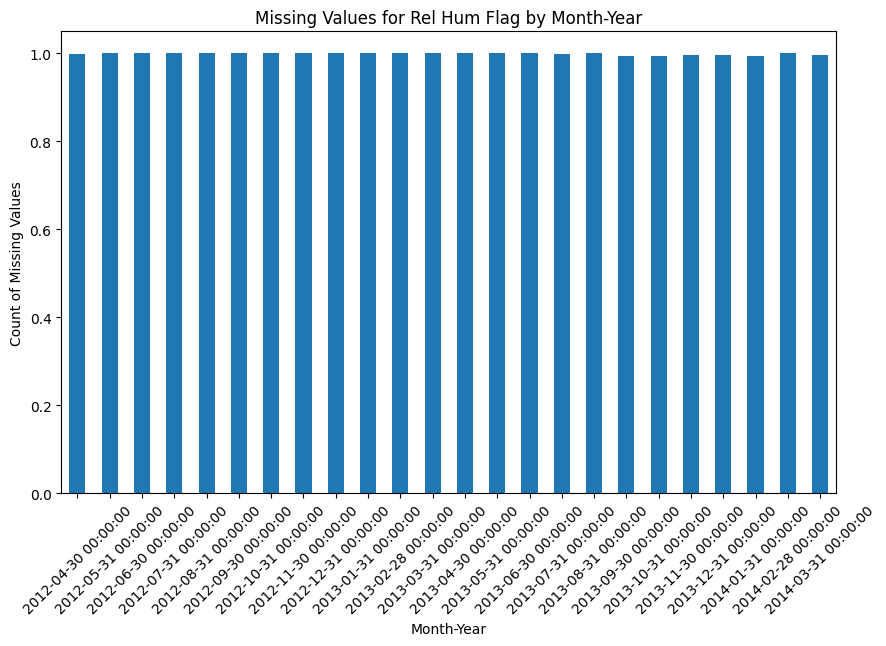

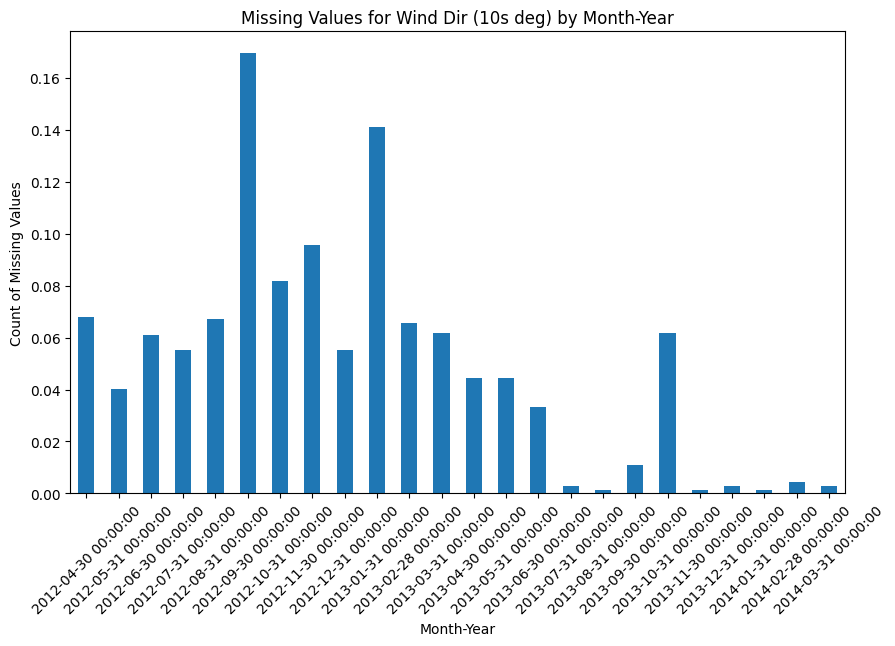

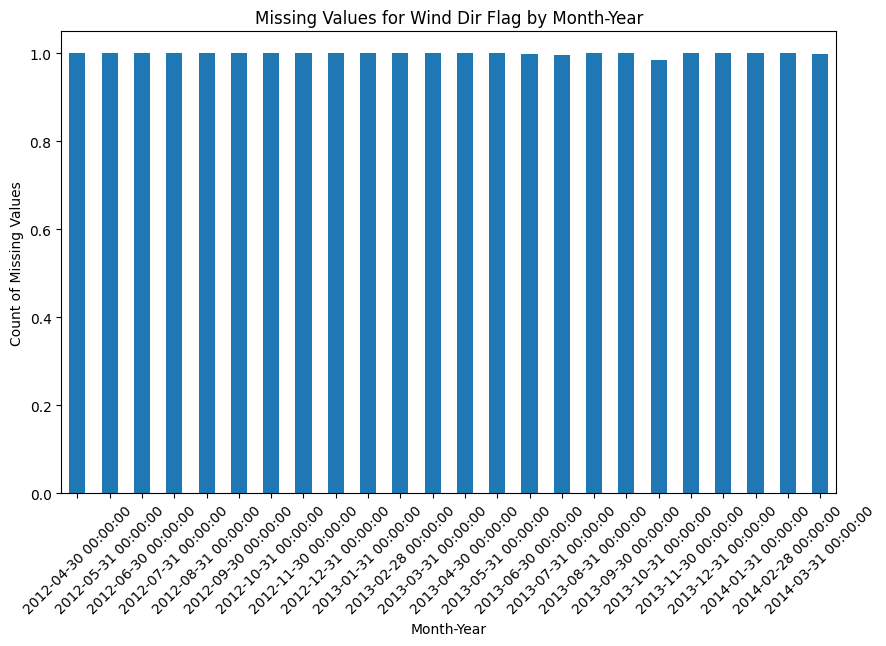

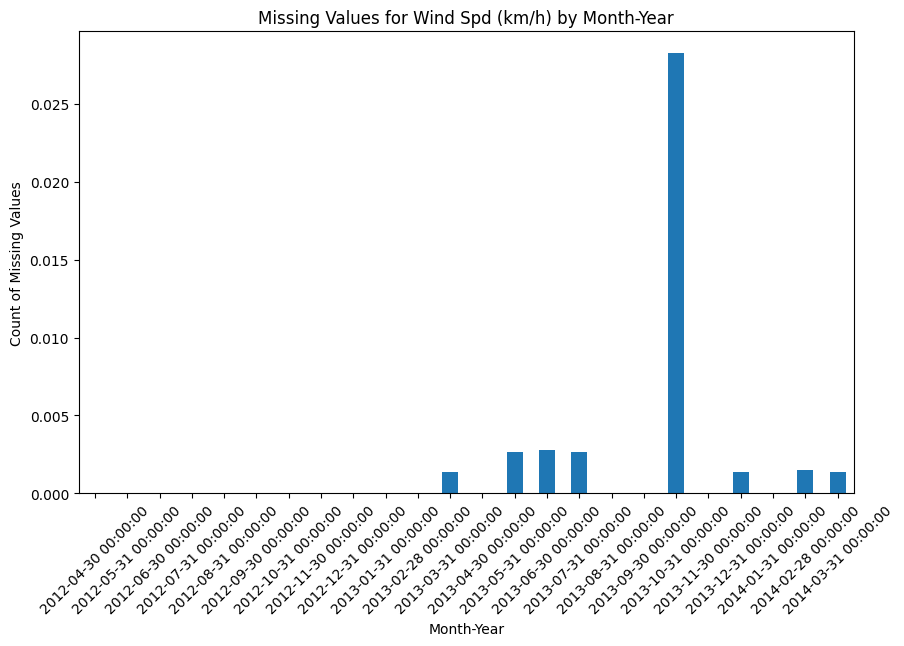

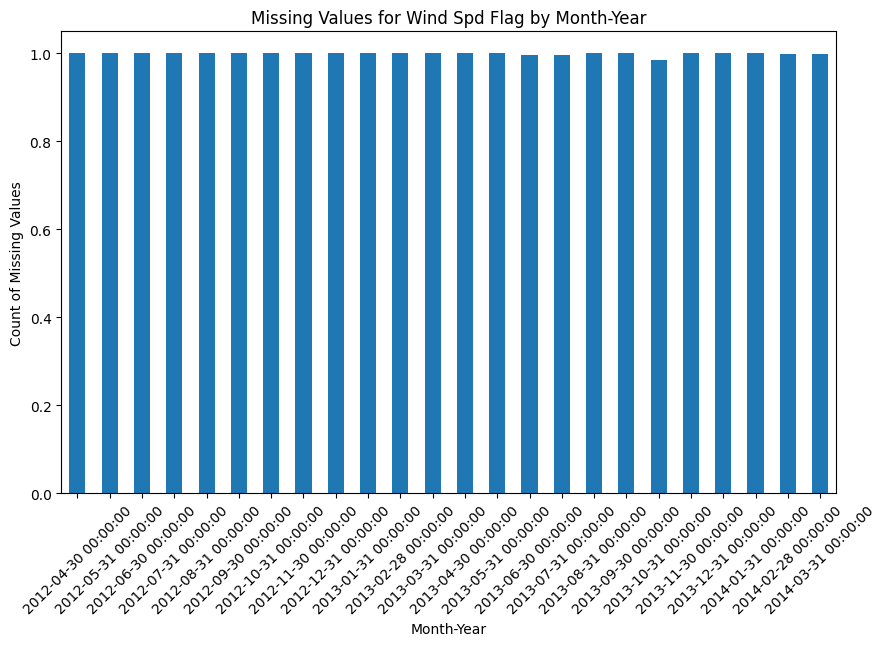

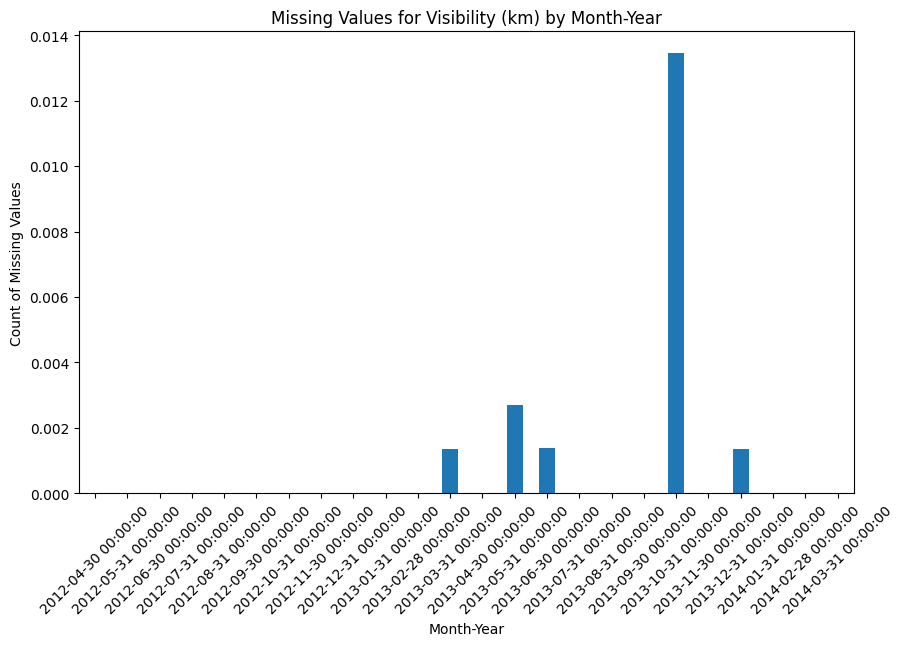

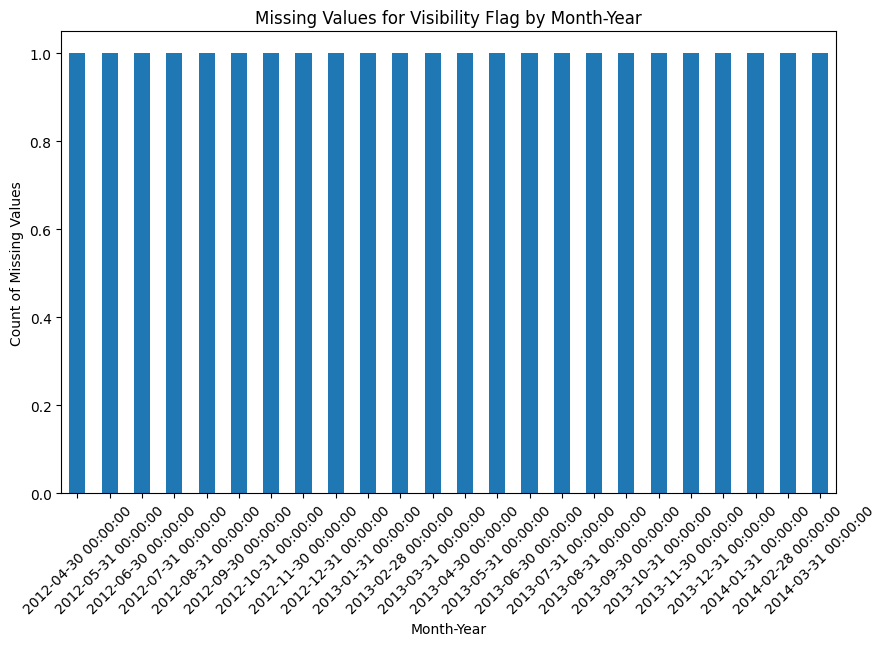

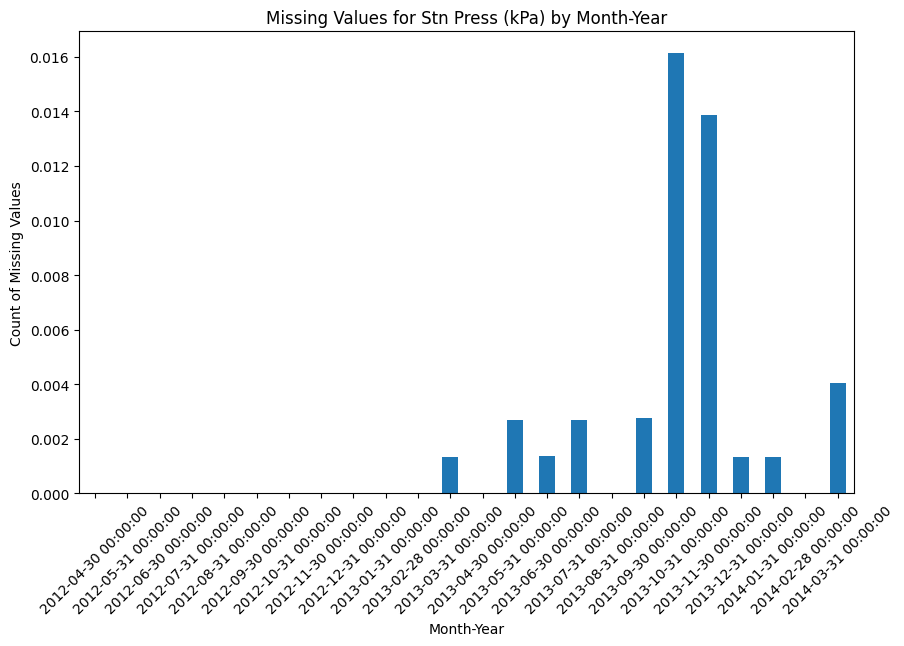

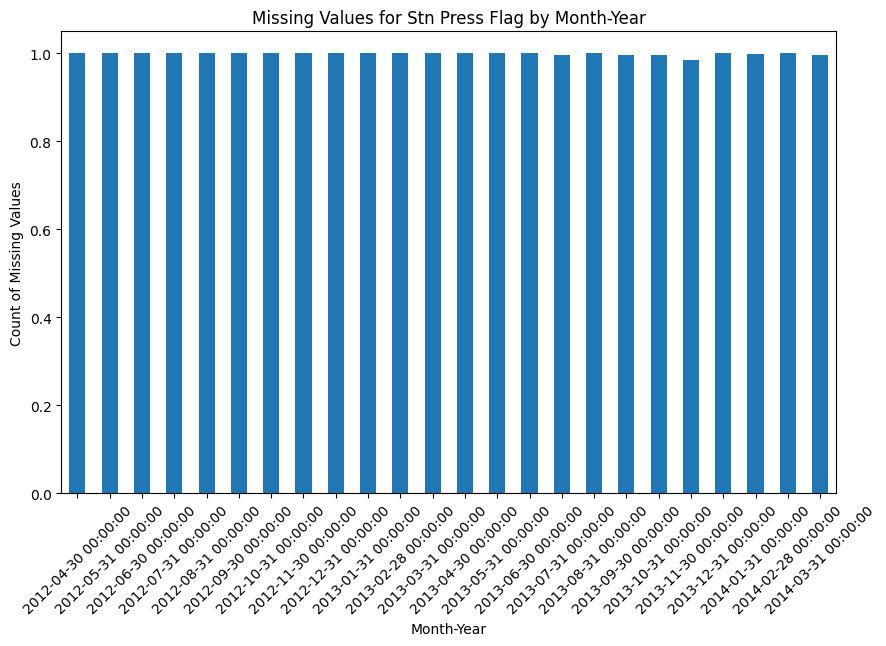

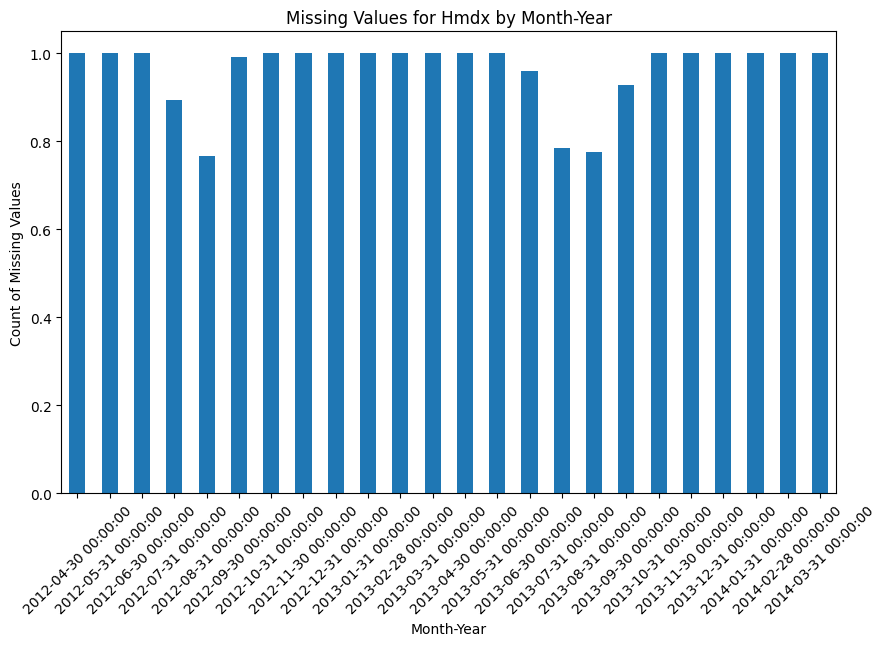

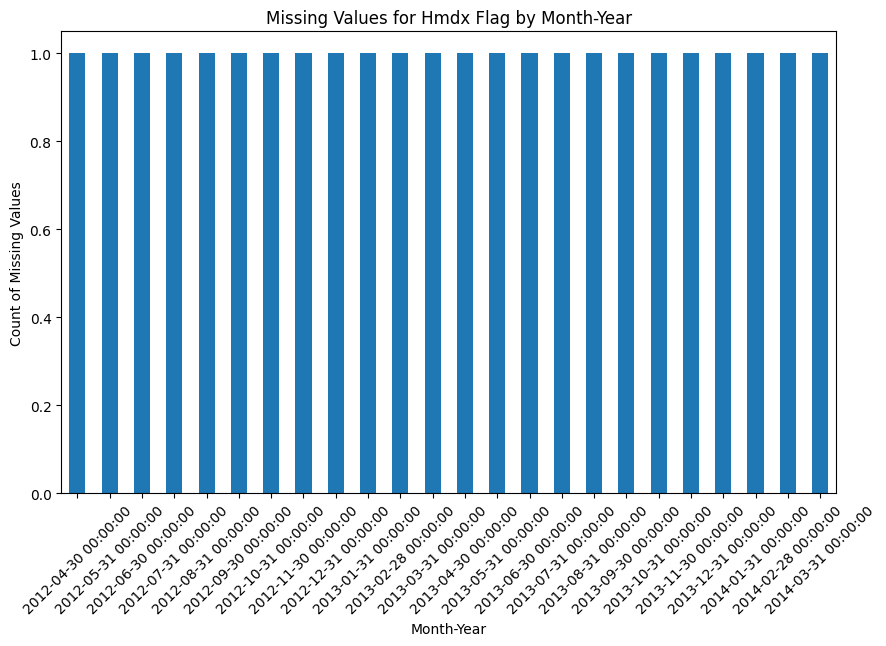

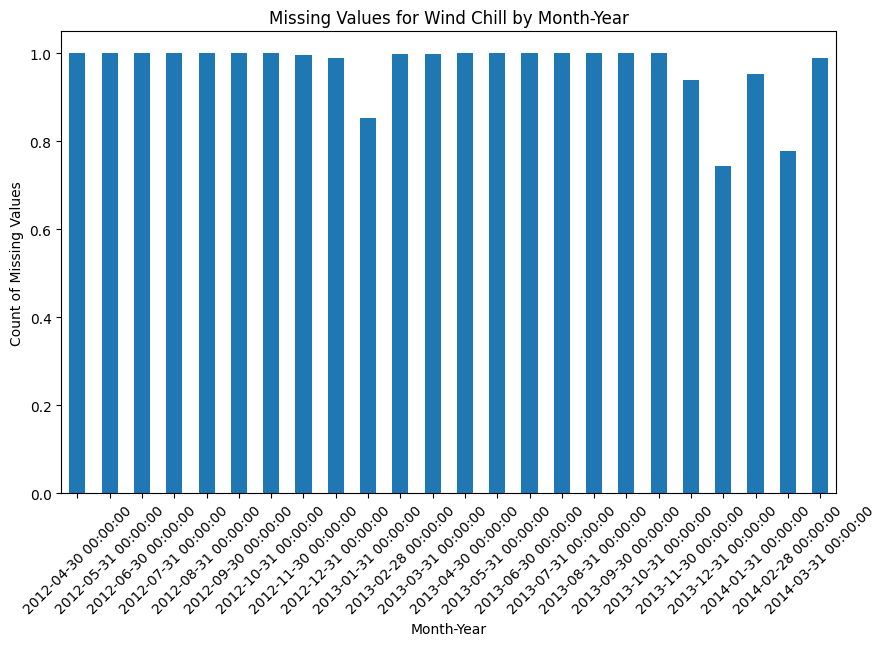

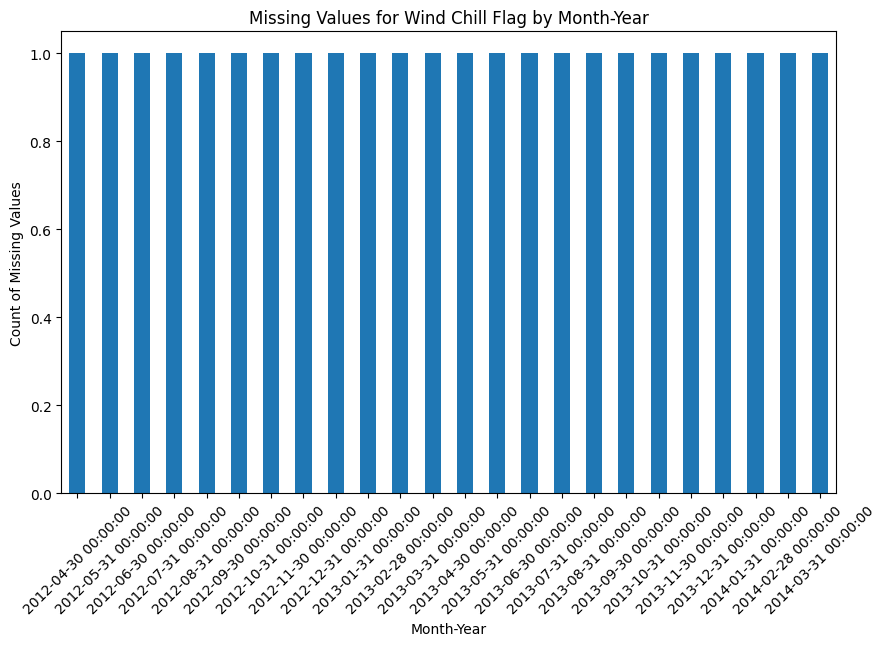

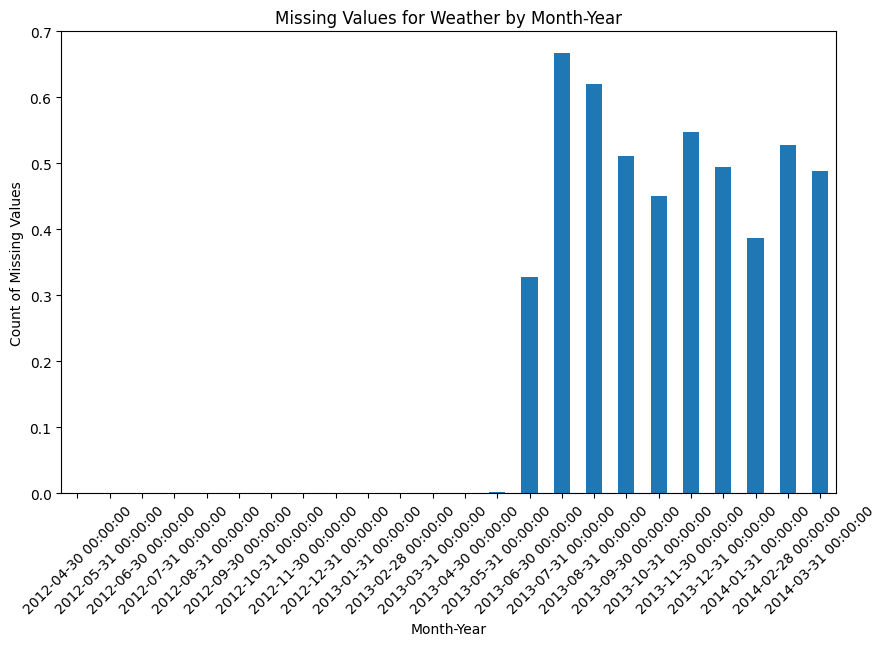

In [ ]:
df_missing = df.isna().astype(int)
df_missing.index = pd.to_datetime(df_missing.index)
# Resample to get monthly sum of missing values
monthly_missing = df_missing.resample('M').mean()

# Plotting
for column in df_missing.columns:
    plt.figure(figsize=(10, 6))
    monthly_missing[column].plot(kind='bar')
    plt.title(f'Missing Values for {column} by Month-Year')
    plt.xlabel('Month-Year')
    plt.ylabel('Count of Missing Values')
    plt.xticks(rotation=45)
    plt.show()

## Select Columns with little to no Null Values for our cleaned dataset

In [ ]:
selected_cols = ['Rel Hum (%)', 'Dew Point Temp (C)', 'Stn Press (kPa)', 'Wind Spd (km/h)', 'Temp (C)', 'Visibility (km)']


In [ ]:
df_cleaned = df[selected_cols]
df_cleaned.head()

,Rel Hum (%),Dew Point Temp (C),Stn Press (kPa),Wind Spd (km/h),Temp (C),Visibility (km)
Date/Time,,,,,,
2012-04-01 00:00,87.0,2.3,99.88,28.0,4.3,12.9
2012-04-01 01:00,86.0,2.2,99.94,17.0,4.4,8.0
2012-04-01 02:00,86.0,1.6,100.00,26.0,3.8,6.4
2012-04-01 03:00,86.0,0.7,100.10,39.0,2.8,8.0
2012-04-01 04:00,87.0,0.4,100.23,30.0,2.4,9.7


In [ ]:
df_cleaned.shape

(17520, 6)

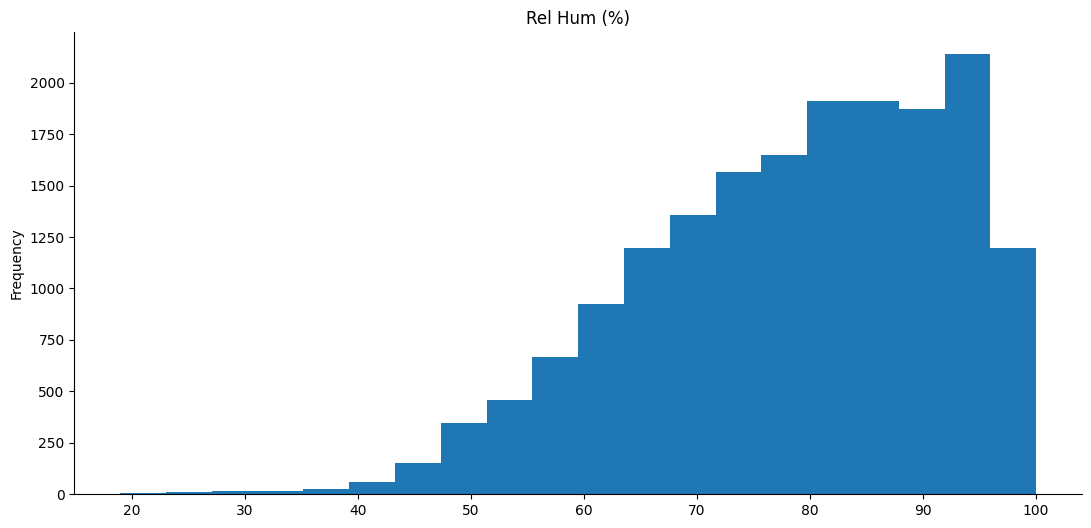

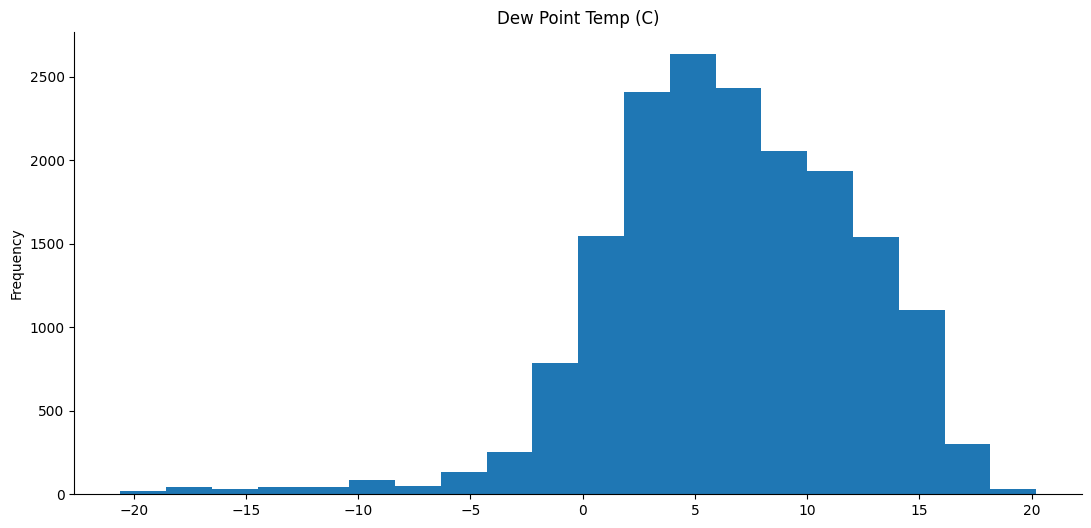

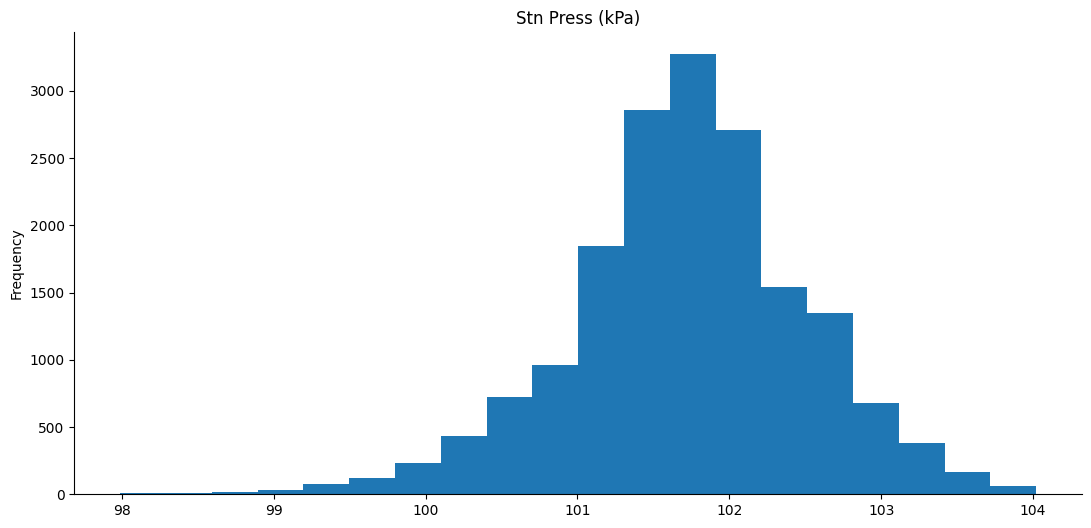

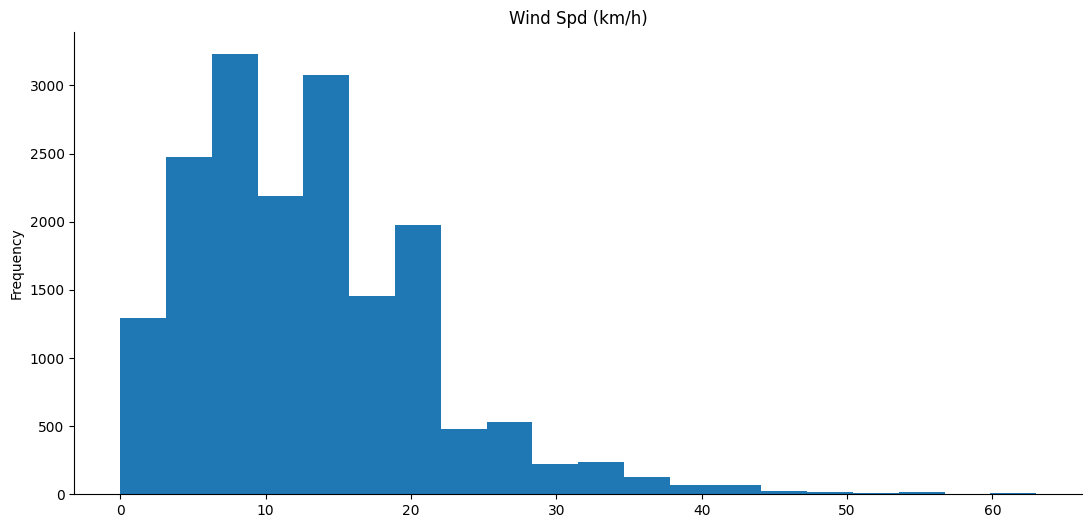

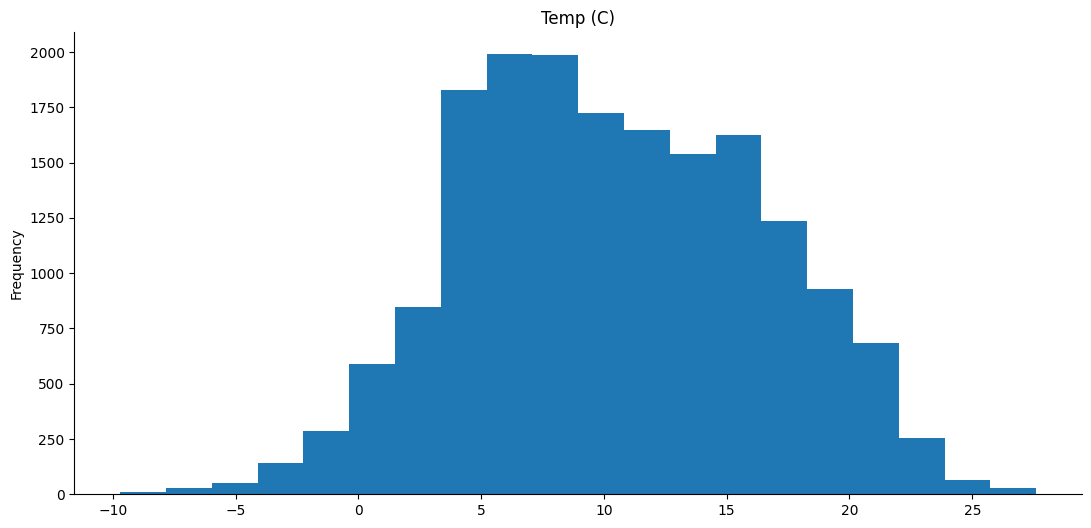

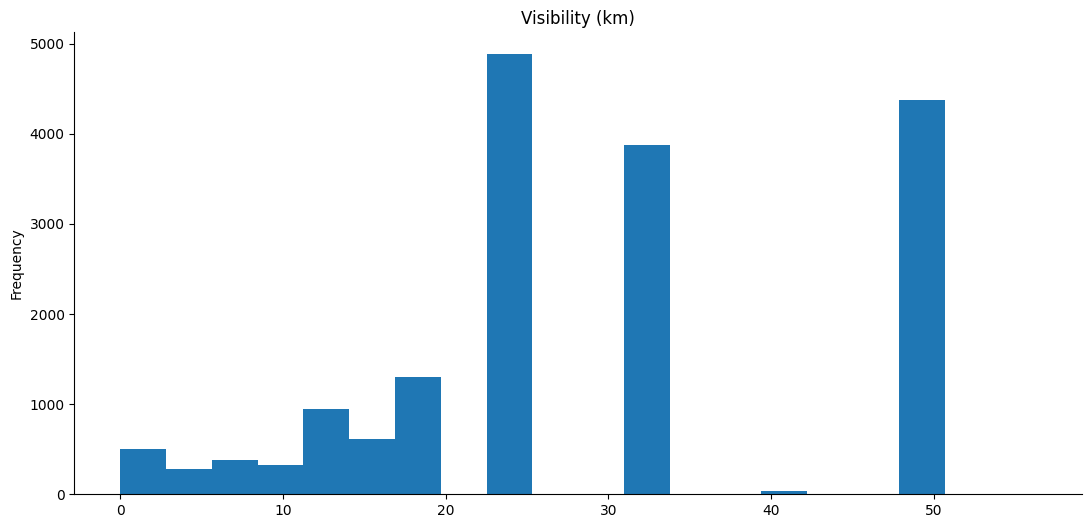

In [ ]:
# @title List of columns to plot
columns_to_plot = ['Rel Hum (%)', 'Dew Point Temp (C)', 'Stn Press (kPa)', 'Wind Spd (km/h)', 'Temp (C)', 'Visibility (km)']

# Plotting
for column in columns_to_plot:
    plt.figure()
    df_cleaned[column].plot(kind='hist', bins=20, title=column)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

### Correlation Analysis:
- Relative Humidity (Rel Hum (%)) and Dew Point Temperature (Dew Point Temp (C)): There is a positive correlation (0.07) which suggests that as the relative humidity increases, the dew point temperature tends to increase as well, although the correlation is weak.

- Relative Humidity (Rel Hum (%)) and Visibility (km): There is a strong negative correlation (-0.59), indicating that higher humidity levels are associated with lower visibility, which is consistent with weather patterns involving fog and mist.

- Dew Point Temperature (Dew Point Temp (C)) and Temperature (Temp (C)): There is a strong positive correlation (0.89), showing that as the temperature increases, the dew point temperature also tends to increase. This is expected as warmer air can hold more moisture.

- Station Pressure (Stn Press (kPa)) and Wind Speed (Wind Spd (km/h)): There is a negative correlation (-0.29), implying that higher wind speeds may be associated with lower atmospheric pressure, although the correlation is not very strong.

- Wind Speed (Wind Spd (km/h)) and Visibility (km): There is a very weak negative correlation (-0.01), suggesting that wind speed has almost no linear relationship with visibility under the conditions represented in the dataset.

- Temperature (Temp (C)) and Visibility (km): A moderate positive correlation (0.39) suggests that higher temperatures might be associated with better visibility, which could be due to the dissipation of fog or other obscuring weather phenomena as temperature rises.

Overall, the matrix provides insights into how some weather conditions are related to each other. High relative humidity is linked to lower visibility, and both temperature and dew point temperature tend to rise together. These correlations are consistent with general meteorological patterns and can help in understanding weather behavior.

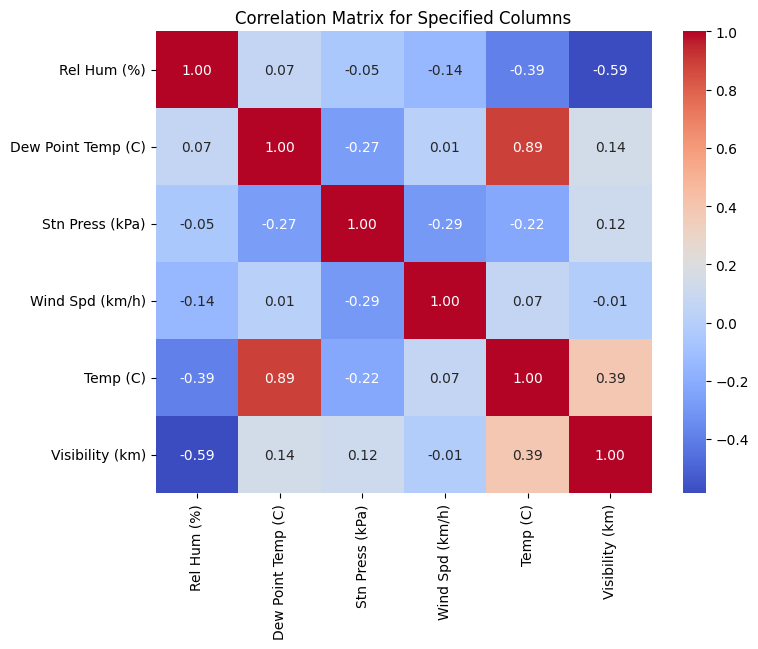

In [ ]:
# Calculating the correlation matrix for the specified columns
correlation_matrix = df_cleaned.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Specified Columns')
plt.show()

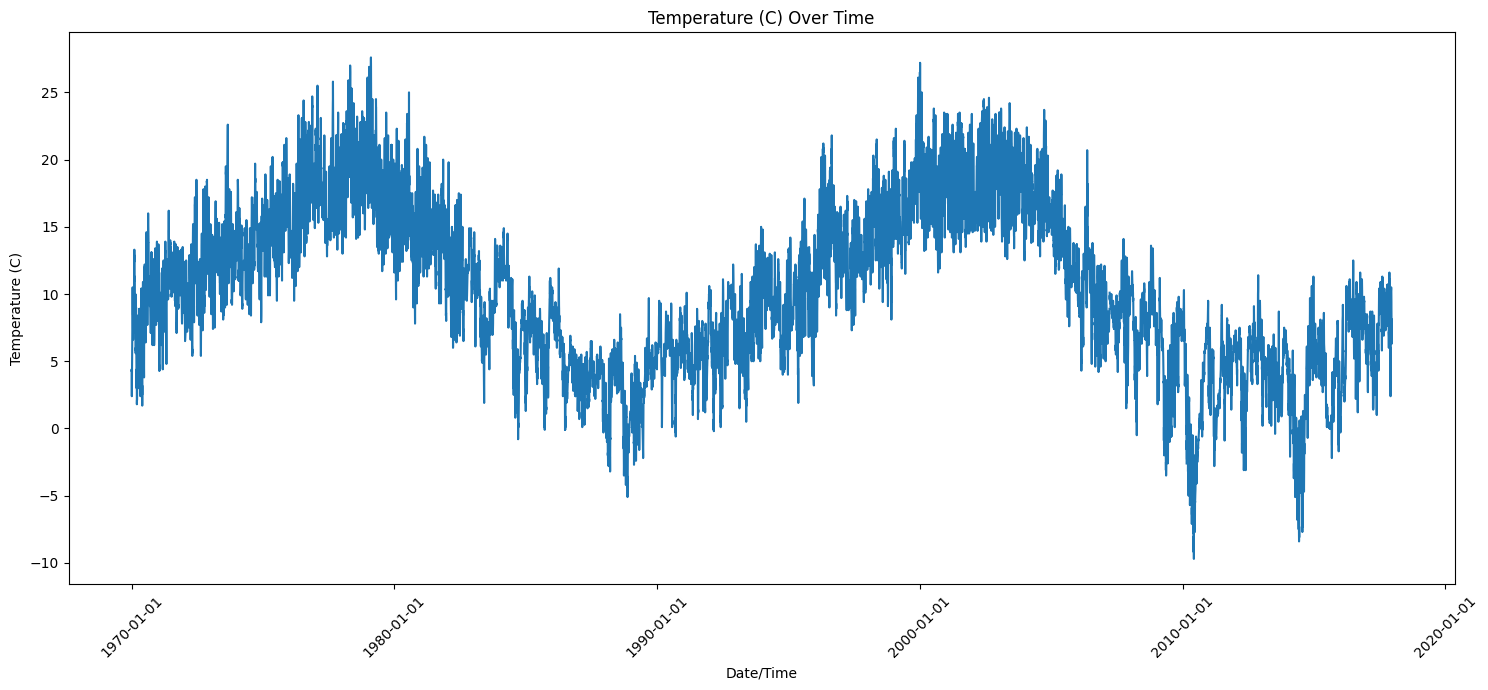

In [ ]:
# Now, plot the 'Temp (C)' column over time
plt.figure(figsize=(15, 7))
plt.plot(df_cleaned.index, df_cleaned['Temp (C)'], color='tab:blue')
plt.title('Temperature (C) Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (C)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned.head()

,Rel Hum (%),Dew Point Temp (C),Stn Press (kPa),Wind Spd (km/h),Temp (C),Visibility (km)
Date/Time,,,,,,
2012-04-01 00:00,87.0,2.3,99.88,28.0,4.3,12.9
2012-04-01 01:00,86.0,2.2,99.94,17.0,4.4,8.0
2012-04-01 02:00,86.0,1.6,100.00,26.0,3.8,6.4
2012-04-01 03:00,86.0,0.7,100.10,39.0,2.8,8.0
2012-04-01 04:00,87.0,0.4,100.23,30.0,2.4,9.7


## Temperature Trend

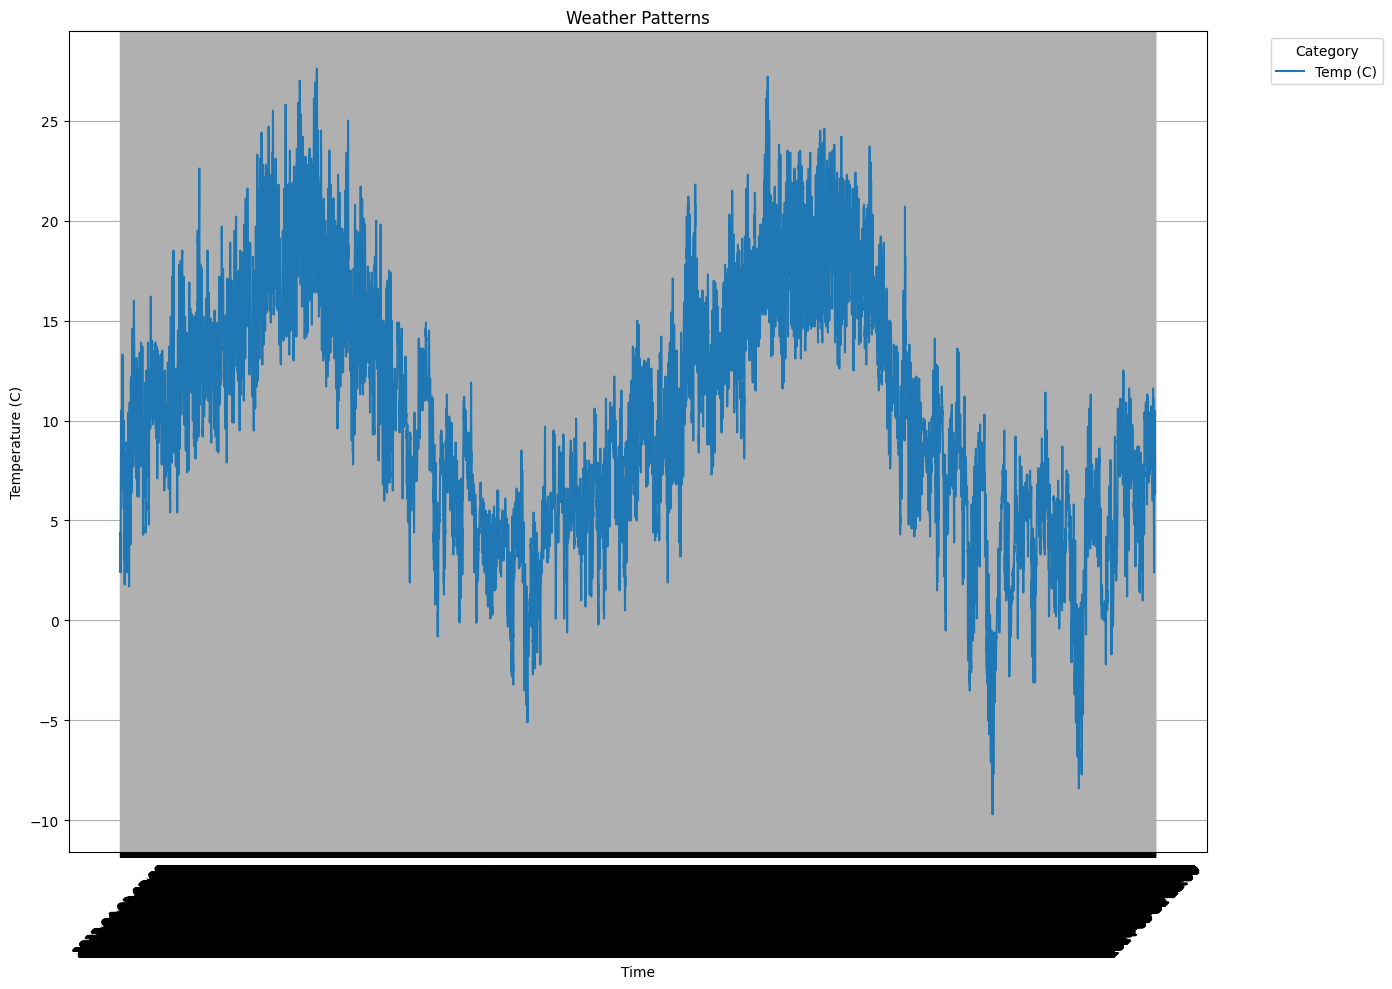

In [ ]:
# columns_to_plot = df.columns.drop(['UNIX_TS','DateTime'])
columns_to_plot = ['Temp (C)']
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS', 'DateTime'])
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df_cleaned.index, df_cleaned[column], label=column)

plt.xlabel('Time')
plt.ylabel('Temperature (C)')
plt.title('Weather Patterns')
plt.xticks(rotation=45)
plt.yscale('linear')  # Apply Linear or logarithmic scale to the y-axis
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Export Cleaned Dataframe

In [ ]:
# Export the DataFrame to a CSV file
df_cleaned.to_csv('/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /data/weather_cleaned.csv', index=True)